In [2]:
#Ready to be published 
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
data_path = "./data/water_pvp/"
all_files = os.listdir(data_path)
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
csv_files

['water-PVP_0.csv',
 'water-PVP_1_7.csv',
 'water-PVP_2_7.csv',
 'water-PVP_3_7.csv',
 'water-PVP_4_7.csv',
 'water-PVP_5_7.csv',
 'water-PVP_6_7.csv',
 'water-PVP_7_7.csv']

In [4]:
def categories_to_viscosities(argument):
    switcher = {
        0: 0.891,
        1: 1.825,
        2: 4.306,
        3: 7.601,
        4: 9.347,
        5: 16.51,
        6: 33.13,
        7: 61.40,
    }
    return switcher.get(argument, "nothing")


In [5]:
import numpy as np
def min_max_scaling(y, min_val, max_val):
    return (y - min_val) / (max_val - min_val)
# Sample target variable
target_variable = np.array([1.825, 4.306, 7.601, 9.347, 16.51, 33.13, 61.40])

# Min-Max Scaling
min_val = 1.825
max_val = 61.40
scaled_target_variable = min_max_scaling(target_variable, min_val, max_val)

# Print the scaled target variable
print("Original Target Variable:", target_variable)
print("Scaled Target Variable (Min-Max):", scaled_target_variable)
# Regenerate the original target variable
regenerated_target_variable = scaled_target_variable * (max_val - min_val) + min_val


print("Scaled Target Variable (Min-Max):", regenerated_target_variable)

Original Target Variable: [ 1.825  4.306  7.601  9.347 16.51  33.13  61.4  ]
Scaled Target Variable (Min-Max): [0.         0.04164499 0.09695342 0.12626102 0.24649601 0.52547209
 1.        ]
Scaled Target Variable (Min-Max): [ 1.825  4.306  7.601  9.347 16.51  33.13  61.4  ]


In [6]:
oil_datas = []
for f_name in csv_files:
    print(f_name)
    category  = f_name.split('_')[1].split('.')[0]
    viscosity = categories_to_viscosities(int(category))
    print(viscosity)
    oil_datas.append({
        'v': viscosity,  # viscosity
        'fn': f_name.split('.')[0],  # file name
        'df': pd.read_csv(data_path + f_name)  # data frame
    })

#oil_datas[3]['df'].to_csv("../data/out.csv") 

water-PVP_0.csv
0.891
water-PVP_1_7.csv
1.825
water-PVP_2_7.csv
4.306
water-PVP_3_7.csv
7.601
water-PVP_4_7.csv
9.347
water-PVP_5_7.csv
16.51
water-PVP_6_7.csv
33.13
water-PVP_7_7.csv
61.4


In [7]:
columns_to_drop = ['No. Droplet', 'RunTime (second)', 'Length of remaining liquid on dropper', 'State of droplet']
for oil_data in oil_datas:
    df = oil_data['df']
    oil_data['single_all'] = df[df['State of droplet'] == "Before_detachment"].drop(columns_to_drop, axis=1)
oil_datas[0]['single_all'].head()
#oil_datas[0]['single_all'].to_csv("../data/out1.csv") 
df.describe()

,RunTime (second),Time per droplet (Second),No. Droplet,Area of droplet (pixels),Perimeter of droplet (pixels),Width/Length of droplet (pixels),Deltoid Diagonal Intersection Y Min Y Distance / Total Length,Center of mass X coord,Center of mass Y coord,Length Of Droplet,Y max,Diameter of droplet,Thinnest part of droplet,Fitting deltoid upper side,Fitting deltoid lower side,Fitting deltoid degree between different sides,Length of remaining liquid on dropper
count,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000
mean,617.267166,2.085472,149.122349,21243.612973,449.450204,0.894330,0.506602,280.391104,219.995019,224.829250,326.094924,187.790378,25.142188,155.483877,141.743015,66.107942,0.356710
std,355.540498,1.207756,85.194912,10043.186826,154.288554,0.173956,0.116793,0.887456,41.186899,74.335359,78.869740,35.676471,36.471465,60.737409,30.857072,29.974631,4.545014
min,1.446956,0.000000,2.000000,1945.000000,101.000000,0.219400,0.112700,270.000000,139.000000,62.000000,167.000000,102.000000,0.000000,54.744863,61.294372,0.000000,0.000000
25%,309.381864,1.040208,75.000000,13281.000000,337.000000,0.778200,0.423600,280.000000,190.000000,169.000000,268.000000,163.000000,9.000000,109.224539,119.331471,71.409302,0.000000
50%,617.263428,2.087084,149.000000,21912.000000,454.000000,0.867800,0.503800,280.000000,221.000000,229.000000,328.000000,196.000000,12.000000,151.162165,145.206749,77.763870,0.000000
75%,925.178332,3.127292,223.000000,29554.000000,573.000000,0.971100,0.607300,281.000000,244.000000,282.000000,383.000000,218.000000,14.000000,193.669822,165.239220,82.982074,0.000000
max,1233.079900,4.540908,296.000000,44450.000000,956.000000,1.691200,1.000000,283.000000,550.000000,456.000000,719.000000,267.000000,138.000000,632.673692,209.773688,90.000000,85.000000


In [8]:
compare_mean = []
for i, oil_data in enumerate(oil_datas):
    df = pd.Series(oil_data['single_all'].mean(), name=oil_data['fn'].split('_')[1])
    compare_mean.append(df)
compare_mean = pd.concat(compare_mean, axis=1)
compare_mean


,0,1,2,3,4,5,6,7
Time per droplet (Second),4.032308,3.824284,3.802482,4.406358,4.358011,4.401413,4.176161,4.141913
Area of droplet (pixels),41540.219780,40023.875536,42611.609890,39911.111524,39681.882979,40047.575000,40483.663043,40374.169492
Perimeter of droplet (pixels),851.340659,843.935622,874.065934,849.762082,853.723404,859.930000,868.407609,878.579661
Width/Length of droplet (pixels),0.586667,0.582704,0.585270,0.576288,0.570911,0.569273,0.560647,0.550106
Deltoid Diagonal Intersection Y Min Y Distance / Total Length,0.680690,0.678880,0.687373,0.688006,0.686137,0.685174,0.697030,0.702391
Center of mass X coord,270.939560,271.270386,269.049451,276.200743,277.326241,277.255000,277.364130,277.538983
Center of mass Y coord,336.159341,331.587983,330.010989,336.427509,336.865248,339.230000,342.798913,345.508475
Length Of Droplet,423.280220,417.502146,416.500000,423.107807,425.333333,428.770000,433.429348,440.386441
Y max,522.280220,516.502146,515.500000,522.107807,524.333333,527.770000,532.429348,539.386441
Diameter of droplet,245.280220,240.236052,242.137363,241.524164,240.531915,241.640000,240.304348,239.698305


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [10]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
datasets_dfs = []
for oil_data in oil_datas:
    df = oil_data['single_all']
    df['viscosity'] = oil_data['v']
    datasets_dfs.append(df)  


In [12]:
def split_train_valid_test(X, y):
    X_erm, X_test, y_erm, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_valid, y_train, y_valid = train_test_split(X_erm, y_erm, test_size=0.30, random_state=50)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [13]:
def split_data_together():
    datasets = pd.concat(datasets_dfs, axis=0).values
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(datasets[:,:-1])
    y = datasets[:, -1]
    print(f"X shape: ${X.shape}, Y shape: ${y.shape}")
    X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X, y)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [14]:
def split_data_separate():
    datasets_together = pd.concat(datasets_dfs, axis=0).values
    min_max_scaler = preprocessing.StandardScaler() # StandardScaler() or MinMaxScaler() can be picked: 
    min_max_scaler.fit(datasets_together[:,:-1])
    splits = ([], [], [], [], [], []) #X_train, X_valid, X_test, y_train, y_valid, y_test
    for df in datasets_dfs:
        np_arr = df.values
        X = min_max_scaler.transform(np_arr[:,:-1])
        y = np_arr[:, -1]
        _splits = split_train_valid_test(X, y)
        for index, _split in enumerate(_splits):
            splits[index].append(_split)
    # return map(np.vstack, splits)
    return np.vstack(splits[0]), np.vstack(splits[1]), np.vstack(splits[2]),\
           np.hstack(splits[3]), np.hstack(splits[4]), np.hstack(splits[5]),

[ 35.82831084  61.26768616  72.66198435  81.92500565  89.67760271
  95.14403516  98.14711634  99.16942548  99.68938132  99.96782183
  99.99622919  99.99868999 100.         100.        ]


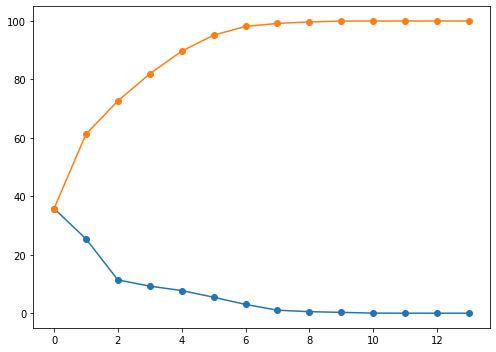

In [15]:
from sklearn.decomposition import PCA 
datasets_together = pd.concat(datasets_dfs, axis=0).values
pca = PCA()
scaled = StandardScaler().fit_transform(datasets_together[:,:-1])
# Fit the spectral data and extract the explained variance ratio
X1 = pca.fit(scaled)
expl_var_1 = X1.explained_variance_ratio_
print(np.cumsum(expl_var_1)*100)
# Plot data
with plt.style.context(()):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
    fig.set_tight_layout(True)
    ax1.plot(expl_var_1*100,'-o',label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1)*100,'-o', label = 'Cumulative variance %')



In [16]:
#X_train, X_valid, X_test, y_train, y_valid, y_test = split_data_together()
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data_separate()
print(f"X_train shape: {X_train.shape}, X_valid shape: {X_valid.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape},y_valid shape: {y_valid.shape}, y_test shape: {y_test.shape}")

X_train shape: (1018, 14), X_valid shape: (441, 14), X_test shape: (368, 14)
y_train shape: (1018,),y_valid shape: (441,), y_test shape: (368,)


In [17]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=14))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))


model.add(Dense(1, activation='relu'))
from tensorflow.keras.callbacks import EarlyStopping
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1500      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,801
Trainable params: 21,801
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid))

Epoch 1/500
32/32 [==============================] - 1s 7ms/step - loss: 627.9818 - mean_squared_error: 627.9818 - val_loss: 378.7220 - val_mean_squared_error: 378.7220
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 222.7337 - mean_squared_error: 222.7337 - val_loss: 144.1146 - val_mean_squared_error: 144.1146
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 99.1797 - mean_squared_error: 99.1797 - val_loss: 77.7802 - val_mean_squared_error: 77.7802
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 62.8744 - mean_squared_error: 62.8744 - val_loss: 60.8692 - val_mean_squared_error: 60.8692
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 46.8543 - mean_squared_error: 46.8543 - val_loss: 58.7251 - val_mean_squared_error: 58.7251
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 37.7144 - mean_squared_error: 37.7144 - val_loss: 47.7531 - val_mean_squared_error: 47.7531
Ep

Epoch 51/500
32/32 [==============================] - 0s 3ms/step - loss: 4.6878 - mean_squared_error: 4.6878 - val_loss: 8.8284 - val_mean_squared_error: 8.8284
Epoch 52/500
32/32 [==============================] - 0s 3ms/step - loss: 4.0262 - mean_squared_error: 4.0262 - val_loss: 8.4002 - val_mean_squared_error: 8.4002
Epoch 53/500
32/32 [==============================] - 0s 4ms/step - loss: 3.8898 - mean_squared_error: 3.8898 - val_loss: 9.8195 - val_mean_squared_error: 9.8195
Epoch 54/500
32/32 [==============================] - 0s 3ms/step - loss: 3.6721 - mean_squared_error: 3.6721 - val_loss: 9.3646 - val_mean_squared_error: 9.3646
Epoch 55/500
32/32 [==============================] - 0s 4ms/step - loss: 3.9620 - mean_squared_error: 3.9620 - val_loss: 8.4376 - val_mean_squared_error: 8.4376
Epoch 56/500
32/32 [==============================] - 0s 3ms/step - loss: 3.7903 - mean_squared_error: 3.7903 - val_loss: 9.1489 - val_mean_squared_error: 9.1489
Epoch 57/500
32/32 [========

32/32 [==============================] - 0s 3ms/step - loss: 2.5171 - mean_squared_error: 2.5171 - val_loss: 8.5095 - val_mean_squared_error: 8.5095
Epoch 102/500
32/32 [==============================] - 0s 3ms/step - loss: 2.4110 - mean_squared_error: 2.4110 - val_loss: 8.6234 - val_mean_squared_error: 8.6234
Epoch 103/500
32/32 [==============================] - 0s 3ms/step - loss: 2.4200 - mean_squared_error: 2.4200 - val_loss: 8.3367 - val_mean_squared_error: 8.3367
Epoch 104/500
32/32 [==============================] - 0s 3ms/step - loss: 2.1194 - mean_squared_error: 2.1194 - val_loss: 8.3434 - val_mean_squared_error: 8.3434
Epoch 105/500
32/32 [==============================] - 0s 3ms/step - loss: 2.2958 - mean_squared_error: 2.2958 - val_loss: 8.2374 - val_mean_squared_error: 8.2374
Epoch 106/500
32/32 [==============================] - 0s 3ms/step - loss: 2.1890 - mean_squared_error: 2.1890 - val_loss: 8.3241 - val_mean_squared_error: 8.3241
Epoch 107/500
32/32 [===============

32/32 [==============================] - 0s 3ms/step - loss: 1.3010 - mean_squared_error: 1.3010 - val_loss: 8.0601 - val_mean_squared_error: 8.0601
Epoch 152/500
32/32 [==============================] - 0s 3ms/step - loss: 1.3102 - mean_squared_error: 1.3102 - val_loss: 8.3925 - val_mean_squared_error: 8.3925
Epoch 153/500
32/32 [==============================] - 0s 3ms/step - loss: 1.5903 - mean_squared_error: 1.5903 - val_loss: 8.9030 - val_mean_squared_error: 8.9030
Epoch 154/500
32/32 [==============================] - 0s 3ms/step - loss: 1.3460 - mean_squared_error: 1.3460 - val_loss: 8.0315 - val_mean_squared_error: 8.0315
Epoch 155/500
32/32 [==============================] - 0s 4ms/step - loss: 1.5215 - mean_squared_error: 1.5215 - val_loss: 7.9852 - val_mean_squared_error: 7.9852
Epoch 156/500
32/32 [==============================] - 0s 4ms/step - loss: 1.2846 - mean_squared_error: 1.2846 - val_loss: 7.8952 - val_mean_squared_error: 7.8952
Epoch 157/500
32/32 [===============

32/32 [==============================] - 0s 3ms/step - loss: 0.6883 - mean_squared_error: 0.6883 - val_loss: 8.0084 - val_mean_squared_error: 8.0084
Epoch 202/500
32/32 [==============================] - 0s 3ms/step - loss: 1.0485 - mean_squared_error: 1.0485 - val_loss: 8.5083 - val_mean_squared_error: 8.5083
Epoch 203/500
32/32 [==============================] - 0s 3ms/step - loss: 1.0978 - mean_squared_error: 1.0978 - val_loss: 8.2015 - val_mean_squared_error: 8.2015
Epoch 204/500
32/32 [==============================] - 0s 3ms/step - loss: 0.9467 - mean_squared_error: 0.9467 - val_loss: 7.7041 - val_mean_squared_error: 7.7041
Epoch 205/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7556 - mean_squared_error: 0.7556 - val_loss: 8.0919 - val_mean_squared_error: 8.0919
Epoch 206/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7837 - mean_squared_error: 0.7837 - val_loss: 7.6541 - val_mean_squared_error: 7.6541
Epoch 207/500
32/32 [===============

32/32 [==============================] - 0s 3ms/step - loss: 0.4854 - mean_squared_error: 0.4854 - val_loss: 7.7800 - val_mean_squared_error: 7.7800
Epoch 252/500
32/32 [==============================] - 0s 3ms/step - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 7.7063 - val_mean_squared_error: 7.7063
Epoch 253/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4331 - mean_squared_error: 0.4331 - val_loss: 8.0287 - val_mean_squared_error: 8.0287
Epoch 254/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5785 - mean_squared_error: 0.5785 - val_loss: 8.0346 - val_mean_squared_error: 8.0346
Epoch 255/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6448 - mean_squared_error: 0.6448 - val_loss: 8.2371 - val_mean_squared_error: 8.2371
Epoch 256/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5638 - mean_squared_error: 0.5638 - val_loss: 7.8622 - val_mean_squared_error: 7.8622
Epoch 257/500
32/32 [===============

32/32 [==============================] - 0s 3ms/step - loss: 0.2999 - mean_squared_error: 0.2999 - val_loss: 7.7446 - val_mean_squared_error: 7.7446
Epoch 302/500
32/32 [==============================] - 0s 3ms/step - loss: 0.3103 - mean_squared_error: 0.3103 - val_loss: 7.8654 - val_mean_squared_error: 7.8654
Epoch 303/500
32/32 [==============================] - 0s 3ms/step - loss: 0.3067 - mean_squared_error: 0.3067 - val_loss: 7.7059 - val_mean_squared_error: 7.7059
Epoch 304/500
32/32 [==============================] - 0s 3ms/step - loss: 0.2488 - mean_squared_error: 0.2488 - val_loss: 7.7770 - val_mean_squared_error: 7.7770
Epoch 305/500
32/32 [==============================] - 0s 3ms/step - loss: 0.2669 - mean_squared_error: 0.2669 - val_loss: 7.7115 - val_mean_squared_error: 7.7115
Epoch 306/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4925 - mean_squared_error: 0.4925 - val_loss: 7.8984 - val_mean_squared_error: 7.8984
Epoch 307/500
32/32 [===============

32/32 [==============================] - 0s 3ms/step - loss: 0.5707 - mean_squared_error: 0.5707 - val_loss: 7.6932 - val_mean_squared_error: 7.6932
Epoch 352/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5761 - mean_squared_error: 0.5761 - val_loss: 7.7440 - val_mean_squared_error: 7.7440
Epoch 353/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4235 - mean_squared_error: 0.4235 - val_loss: 7.7292 - val_mean_squared_error: 7.7292
Epoch 354/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5140 - mean_squared_error: 0.5140 - val_loss: 7.7256 - val_mean_squared_error: 7.7256
Epoch 355/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6213 - mean_squared_error: 0.6213 - val_loss: 7.9190 - val_mean_squared_error: 7.9190
Epoch 356/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4038 - mean_squared_error: 0.4038 - val_loss: 7.5302 - val_mean_squared_error: 7.5302
Epoch 357/500
32/32 [===============

32/32 [==============================] - 0s 3ms/step - loss: 0.2008 - mean_squared_error: 0.2008 - val_loss: 7.5340 - val_mean_squared_error: 7.5340
Epoch 402/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1728 - mean_squared_error: 0.1728 - val_loss: 7.5108 - val_mean_squared_error: 7.5108
Epoch 403/500
32/32 [==============================] - 0s 3ms/step - loss: 0.2032 - mean_squared_error: 0.2032 - val_loss: 7.8644 - val_mean_squared_error: 7.8644
Epoch 404/500
32/32 [==============================] - 0s 3ms/step - loss: 0.3201 - mean_squared_error: 0.3201 - val_loss: 7.6688 - val_mean_squared_error: 7.6688
Epoch 405/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4080 - mean_squared_error: 0.4080 - val_loss: 7.9654 - val_mean_squared_error: 7.9654
Epoch 406/500
32/32 [==============================] - 0s 3ms/step - loss: 0.3008 - mean_squared_error: 0.3008 - val_loss: 7.4890 - val_mean_squared_error: 7.4890
Epoch 407/500
32/32 [===============

32/32 [==============================] - 0s 3ms/step - loss: 0.3507 - mean_squared_error: 0.3507 - val_loss: 7.5753 - val_mean_squared_error: 7.5753
Epoch 452/500
32/32 [==============================] - 0s 3ms/step - loss: 0.2121 - mean_squared_error: 0.2121 - val_loss: 7.6037 - val_mean_squared_error: 7.6037
Epoch 453/500
32/32 [==============================] - 0s 3ms/step - loss: 0.2372 - mean_squared_error: 0.2372 - val_loss: 7.6554 - val_mean_squared_error: 7.6554
Epoch 454/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1520 - mean_squared_error: 0.1520 - val_loss: 7.5168 - val_mean_squared_error: 7.5168
Epoch 455/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1487 - mean_squared_error: 0.1487 - val_loss: 7.4364 - val_mean_squared_error: 7.4364
Epoch 456/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1870 - mean_squared_error: 0.1870 - val_loss: 7.4414 - val_mean_squared_error: 7.4414
Epoch 457/500
32/32 [===============

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


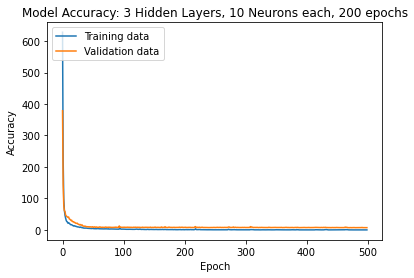

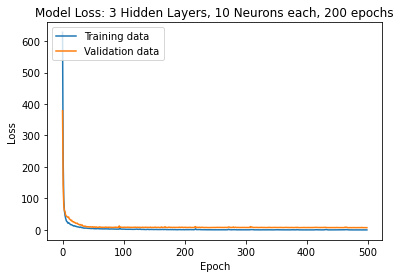

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Accuracy: 3 Hidden Layers, 10 Neurons each, 200 epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss: 3 Hidden Layers, 10 Neurons each, 200 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper left')
plt.show()

In [20]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_valid= model.predict(X_valid)
scores1 = model.evaluate(X_valid, y_valid, verbose=0)
print('Accuracy on validation data: {}% \n Error on validation data: {}'.format(scores1[1], 1 - scores1[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

32/32 [==============================] - 0s 1ms/step
Accuracy on training data: 0.09386805444955826% 
 Error on training data: 0.9061319455504417
14/14 [==============================] - 0s 1ms/step
Accuracy on validation data: 7.279563903808594% 
 Error on validation data: -6.279563903808594
12/12 [==============================] - 0s 1ms/step
Accuracy on test data: 7.124683380126953% 
 Error on test data: -6.124683380126953


In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

# Print the results
print("Training Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

Training Error Measurements
MAE: 0.19986016917650262
MSE: 0.09386775156381358
RMSE: 0.30637844500521505
R2 score: 0.99978512771686


In [22]:

mae = mean_absolute_error(y_valid, pred_valid)
mse = mean_squared_error(y_valid, pred_valid)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, pred_valid)

# Print the results
print("Validataion Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

Validataion Error Measurements
MAE: 1.5975074996191359
MSE: 7.2795634417140285
RMSE: 2.6980666118007592
R2 score: 0.9832781148694724


In [23]:

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)

# Print the results
print("Testing Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)


Testing Error Measurements
MAE: 1.5227633340812248
MSE: 7.124683630961021
RMSE: 2.6692103009993464
R2 score: 0.9835959195692073


In [24]:
total=0

for i in range(0,368):
    PercentError= (y_test[i]-pred_test[i])/(y_test[i])*100
    #print("Actual Value :",y_test[i],"Predicted value :",pred_test[i], "Error :",abs(PercentError))
    #print(abs(PercentError))
    total=total+abs(PercentError)
print("Prediction accuracy on Test Set :",100-total/367)

Prediction accuracy on Test Set : [87.28531]


In [25]:
total=0
for i in range(0,1018):
    PercentError= (y_train[i]-pred_train[i])/(y_train[i])*100
    #print("Actual Value :",y_test[i],"Predicted value :",pred_test[i], "Error :",abs(PercentError))
    #print(abs(PercentError))
    total=total+abs(PercentError)
print("Prediction accuracy on Training Set :",100-total/1017)

Prediction accuracy on Training Set : [98.022995]


In [26]:
total=0
for i in range(0,441):
    PercentError= (y_valid[i]-pred_valid[i])/(y_valid[i])*100
    #print("Actual Value :",y_test[i],"Predicted value :",pred_test[i], "Error :",abs(PercentError))
    #print(abs(PercentError))
    total=total+abs(PercentError)
print("Prediction accuracy on Validation Set :",100-total/441)

Prediction accuracy on Validation Set : [86.66036]
